# **Project 87: Predicting Material Backorders in Inventory Management using Machine Learning**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#from google.colab import drive
#drive.mount('/gdrive')
#%cd /gdrive

In [5]:
data_path = 'C:/users/ganesh.chandra/Proj 87- Determinig items for shortage prior occurence- Inventory Mgmt/train_Data.csv'
df = pd.read_csv(data_path)
df

C:\Users\ganesh.chandra\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,...,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,...,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,...,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,...,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No


In [6]:
data_path = 'C:/users/ganesh.chandra/Proj 87- Determinig items for shortage prior occurence- Inventory Mgmt/Kaggle_Test_Dataset_v2.csv'
test = pd.read_csv(data_path)
test

C:\Users\ganesh.chandra\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242071,3526988,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242072,3526989,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242073,3526990,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242074,3526991,2913.0,12.0,0.0,0.0,0.0,0.0,0.0,30.0,88.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No


***Data Points and features available in data set***

In [7]:
print(df.shape)
print(test.shape)

(1687861, 23)
(242076, 23)


***Sample pre-view of data***

In [8]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


***Column Names in Data***




In [9]:
print(df.columns)
print(test.columns)

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')
Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')


Col Description                             Col Name 
x1	Prduct ID	                              sku
x2	Current inventory level of component	  national_inv
x3	Registered transit time	                lead_time
x4	In transit quantity	                    in_transit_qty
x5	Forecast sales for the next 3 months	  forecast_3_month
x6	Forecast sales for the next 6 months	  forecast_6_month
x7	Forecast sales for the next 9 months	  forecast_9_month
x8	Sales quantity for the prior 1 month	  sales_1_month
x9	Sales quantity for the prior 3 month	  sales_3_month
x10	Sales quantity for the prior 6 month	  sales_6_month
x11	Sales quantity for the prior 9 month	  sales_9_month
x12	Minimum recommended amount in stock	    min_bank
x13	Parts overdue from source	              pieces_past_due
x14	Source performance in last 6 months	    perf_6_month_avg
x15	Source performance in last 12 months	  perf_12_month_avg
x16	Amount of stock orders overdue	        local_bo_qty
x17	General risk flags	                    deck_risk
x18	General risk flags	                    oe_consdft
x19	General risk flags	                    ppap_risk
x20	General risk flags	                    stop_auto_buy
x21	General risk flags	                    rev_stop
x22	General risk flags	                    potential_issue
x23	Product went on backorder	              went_on_backorder


In [10]:
df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


***Finding Data With Missing Values***



In [11]:
#Counting Missing Values in Each Column of Data
df.isnull().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [12]:
df[df.went_on_backorder.isnull()]

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687860,(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observation 1: From the above two analysis we can observe that apart from "lead_time" column in the dataset there are only 1 missing values in each column. We also saw using our output column "went_on_backorder" that there is only 1 row where all the values are "NaN". Hence we will be dropping only 1 row from the dataframe.**

In [13]:
df = df[:-1]
df.shape

(1687860, 23)

In [14]:
test = test[:-1]
test.shape

(242075, 23)

***Count of Data Points for each class which went to backorder and which didn't***

In [15]:
df["went_on_backorder"].value_counts()

No     1676567
Yes      11293
Name: went_on_backorder, dtype: int64

**Observation 2: The count for the two classes which went to backorder and which didn't clearly indicates we are dealing with imbalanced data set where data points indicating the backorder are very less compared to majority class of items which didn't go in backorder.**




***Checking for Duplicate Values in Dataset - No Duplicate Values were Found***

In [16]:
df[df.duplicated(["sku"])]

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder


***Correlation Analysis***

<AxesSubplot: >

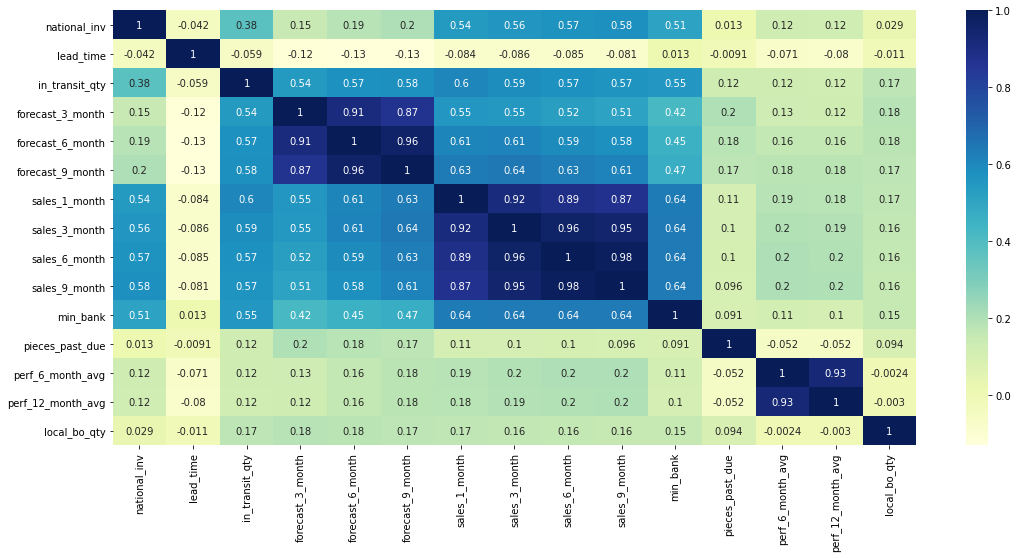

In [17]:
cor= df.corr(method='spearman')
plt.figure(figsize=(18,8))
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True,cmap="YlGnBu" )

**Observation 3: It is observed from the heatmap that "forecast" and "sales" groups have high correlation among themeselves**

***Plotting Scatter Plot for Sales Vs Forecast vs Went_On_Backorder***:

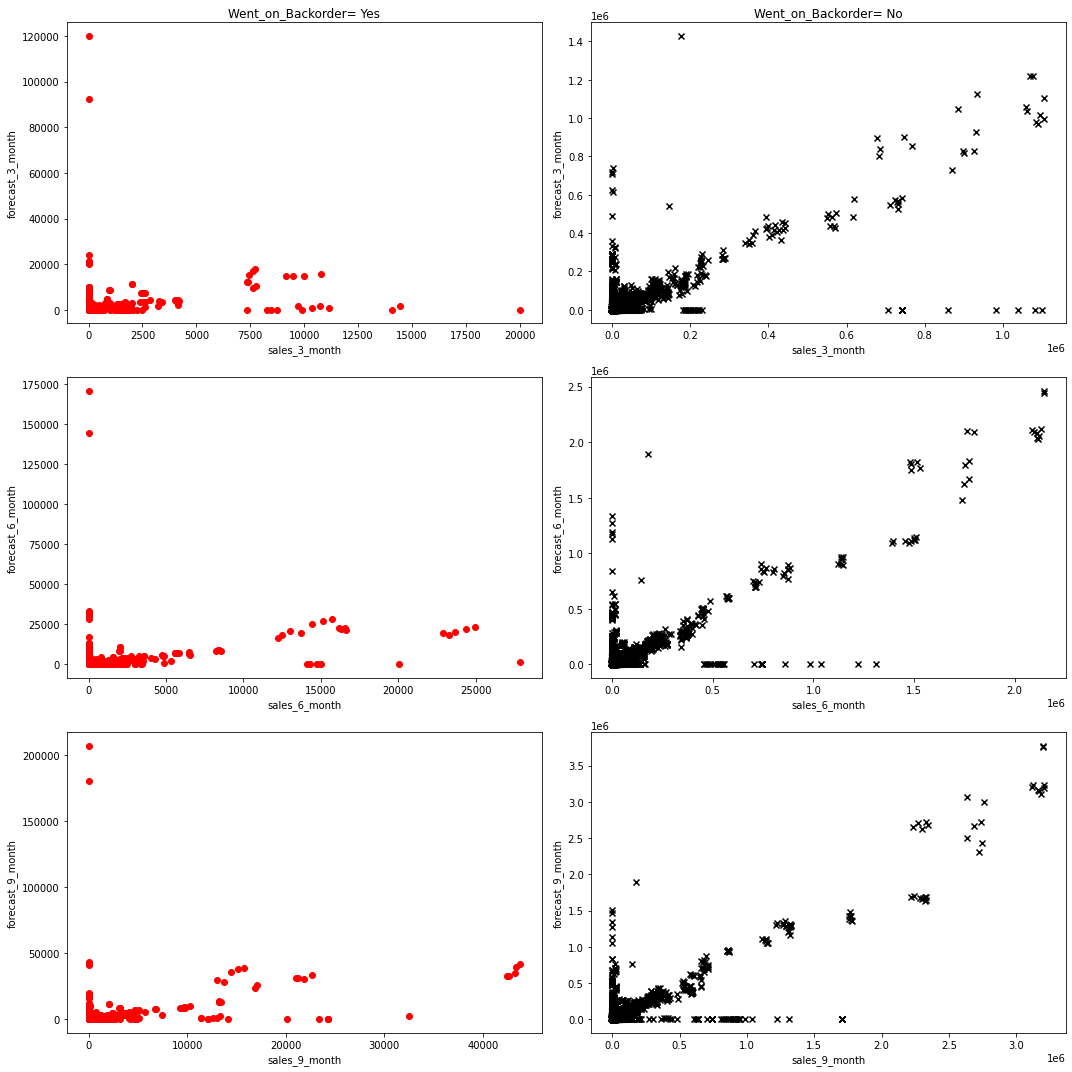

In [18]:
#from matplotlib.colorbar import consdfed_layout
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(3,2,figsize=(15, 15))

ax[0,0].scatter(x='sales_3_month', y='forecast_3_month', data=df[df['went_on_backorder']=="Yes"],marker="o", color="r")
ax[0,0].set(xlabel='sales_3_month',ylabel='forecast_3_month',title="Went_on_Backorder= Yes")
      
ax[0,1].scatter(x='sales_3_month', y='forecast_3_month', data=df[df['went_on_backorder']=="No"],marker="x", color="k")
ax[0,1].set(xlabel='sales_3_month',ylabel='forecast_3_month',title="Went_on_Backorder= No")

ax[1,0].scatter(x='sales_6_month', y='forecast_6_month', data=df[df['went_on_backorder']=="Yes"],marker="o", color="r")
ax[1,0].set(xlabel='sales_6_month',ylabel='forecast_6_month')

ax[1,1].scatter(x='sales_6_month', y='forecast_6_month', data=df[df['went_on_backorder']=="No"],marker="x", color="k")
ax[1,1].set(xlabel='sales_6_month',ylabel='forecast_6_month')

ax[2,0].scatter(x='sales_9_month', y='forecast_9_month', data=df[df['went_on_backorder']=="Yes"],marker="o", color="r")
ax[2,0].set(xlabel='sales_9_month',ylabel='forecast_9_month')

ax[2,1].scatter(x='sales_9_month', y='forecast_9_month', data=df[df['went_on_backorder']=="No"],marker="x", color="k")
ax[2,1].set(xlabel='sales_9_month',ylabel='forecast_9_month')

fig.tight_layout()


**Observation 4:**

**i.> As observed from corr heatmap, we have plotted separately here sales vs forecast data categorised separately into items which went to backorder and not**

**ii.> We can observe sales and forecast value approximately vary with each other in sync, however there are outliers in data.**

**iii.> Also, we can observe there are products with 0 sales and forecast but still they are in backorder which indicates either they are overdue from past or there is no current inventory level for them**


In [19]:
#Generating pivot table to check total qty of backorders vs the inventory level (sum of national_inv)
table=pd.pivot_table(df,index="went_on_backorder",values=["national_inv","lead_time","in_transit_qty","sku"],aggfunc={"national_inv":"sum",
                      "lead_time":"sum","in_transit_qty":"sum","sku":"count"})   
table

,in_transit_qty,lead_time,national_inv,sku
went_on_backorder,,,,
No,74304650.0,12423676.0,837125192.0,1676567
Yes,48996.0,69352.0,242040.0,11293


In [20]:
#Finding Data points which went to backorder where invoentory level is either less or equal to 0 = 890 products
df[(df['went_on_backorder']=="Yes") & (df['national_inv']<0)]

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
176,1111655,-55.0,8.0,2.0,428.0,526.0,606.0,25.0,100.0,205.0,...,0.0,-99.00,-99.00,56.0,No,No,No,Yes,No,Yes
191,1111670,-499.0,12.0,350.0,3452.0,5044.0,7188.0,747.0,2550.0,3572.0,...,0.0,0.49,0.72,525.0,No,No,No,Yes,No,Yes
1577,1113057,-4.0,8.0,0.0,24.0,41.0,50.0,3.0,6.0,19.0,...,1.0,0.77,0.74,4.0,No,No,No,Yes,No,Yes
4141,1115620,-34.0,8.0,0.0,120.0,240.0,240.0,83.0,122.0,144.0,...,0.0,1.00,0.97,34.0,No,No,No,Yes,No,Yes
5132,1116610,-1.0,0.0,0.0,26.0,36.0,51.0,8.0,18.0,42.0,...,0.0,0.00,0.00,1.0,No,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687738,1574269,-3.0,16.0,0.0,13.0,28.0,28.0,4.0,11.0,14.0,...,0.0,0.62,0.62,3.0,Yes,No,Yes,Yes,No,Yes
1687781,1552323,-21.0,2.0,39.0,0.0,0.0,0.0,82.0,106.0,170.0,...,0.0,0.98,0.99,21.0,No,No,No,Yes,No,Yes
1687826,1569674,-7.0,8.0,0.0,96.0,96.0,144.0,12.0,45.0,74.0,...,0.0,0.95,0.84,7.0,No,No,No,Yes,No,Yes
1687836,1473147,-94.0,8.0,25.0,786.0,1226.0,1697.0,304.0,457.0,731.0,...,0.0,0.44,0.62,126.0,No,No,No,Yes,No,Yes


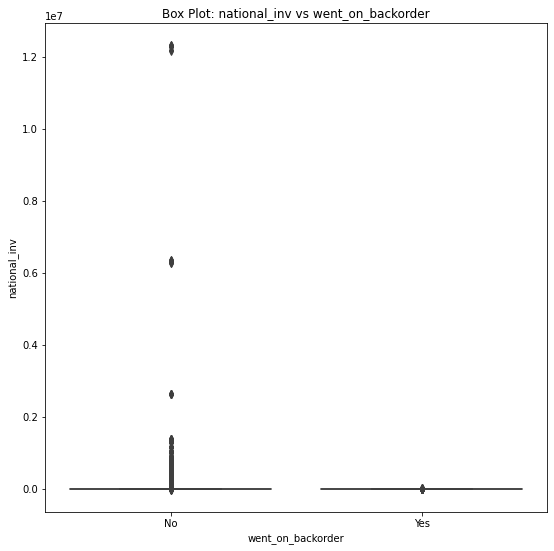

In [21]:
#box-plot for national_inv vs went_on_backorder
plt.figure(figsize=(9, 9))
sns.boxplot(x='went_on_backorder', y='national_inv', data=df)
plt.title('Box Plot: national_inv vs went_on_backorder')
plt.xlabel('went_on_backorder')
plt.ylabel('national_inv')
plt.show()

In [22]:
#applying log on national_inv and a small epsilon as there are zeros & -ve values. log(0) = information we don't want inf on our plot.
epsilon = 1e-7
log_national_inv = np.log(df['national_inv'] + epsilon)
df['log_national_inv'] = log_national_inv
df.head(2)


C:\Users\ganesh.chandra\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-22-c85dc3f68496>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_national_inv'] = log_national_inv


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,log_national_inv
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99.00,-99.00,0.0,No,No,No,Yes,No,No,-16.118096
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.99,0.99,0.0,No,No,No,Yes,No,No,0.693147


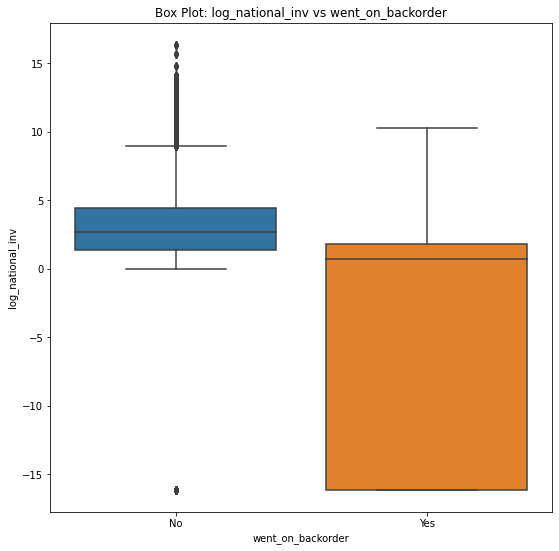

In [23]:
plt.figure(figsize=(9, 9))
sns.boxplot(x='went_on_backorder', y='log_national_inv', data=df)
plt.title('Box Plot: log_national_inv vs went_on_backorder')
plt.xlabel('went_on_backorder')
plt.ylabel('log_national_inv')
plt.show()

In [24]:
df.drop('log_national_inv', axis=1, inplace=True) #dropping off the log column as it is not useful for us

C:\Users\ganesh.chandra\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


**Plotting Pair Plot for Inventory Level vs Sales vs Went_On_Backorder**

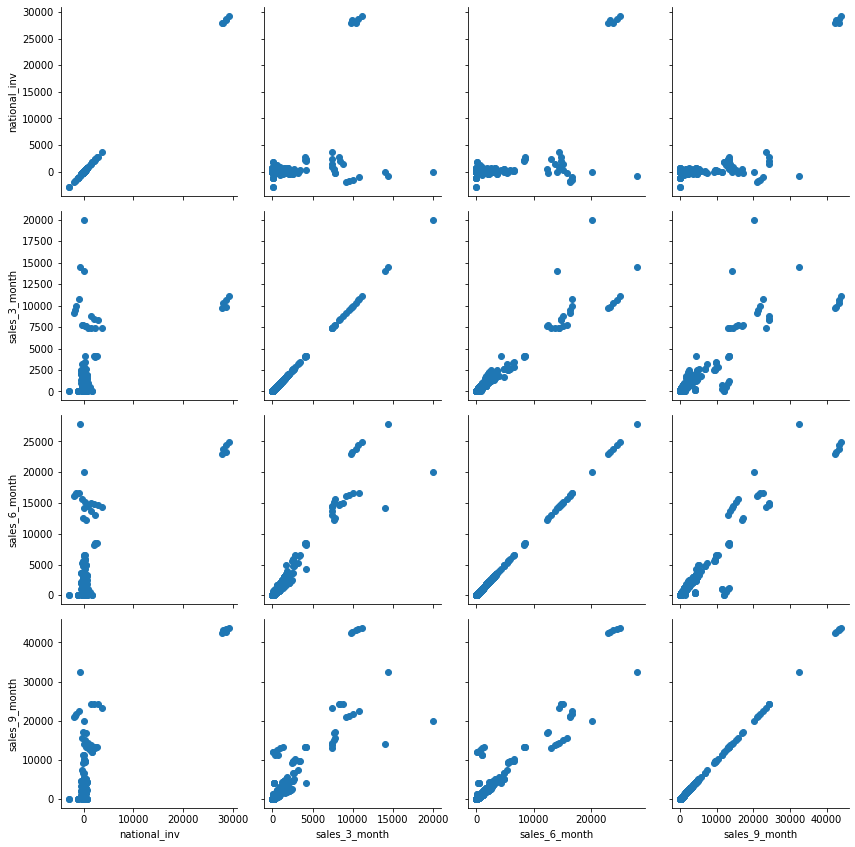

In [25]:
cols = ["national_inv",'sales_3_month','sales_6_month','sales_9_month']
g = sns.PairGrid(df[df['went_on_backorder']=="Yes"],vars=cols, hue="went_on_backorder",height=3)

g.map(plt.scatter)

**Plotting Pair Plot for Inventory Level vs Forecast vs Went_On_Backorder**

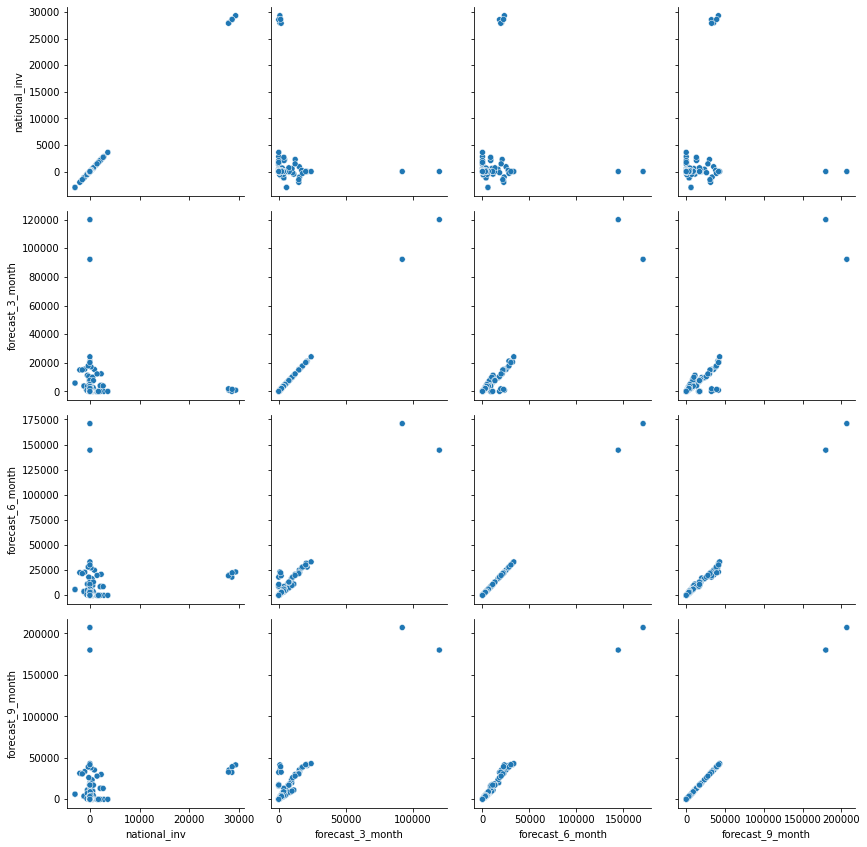

In [26]:
cols = ["national_inv",'forecast_3_month','forecast_6_month','forecast_9_month']
g = sns.PairGrid(df[df['went_on_backorder']=="Yes"],vars=cols, hue="went_on_backorder",height=3)

g.map(sns.scatterplot,marker="o", color="r")

**Strip Plot for 'Inventory Level', 'Performance Previous To 6 MOnths', 'Performance Previous To 12 Months', 'Overdue Stock From Source', 'Current Stock Overdue' & 'Minimum Receommended Stock in Inventory' for Products Which Went To backorder**

<AxesSubplot: xlabel='went_on_backorder', ylabel='min_bank'>

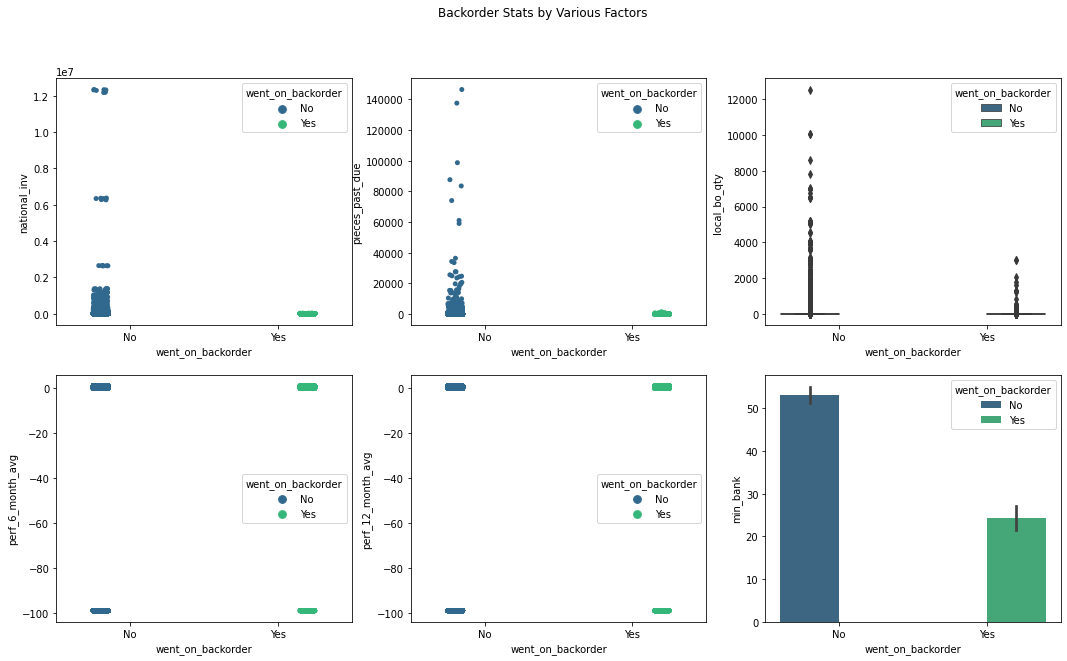

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Backorder Stats by Various Factors')

sns.stripplot(ax=axes[0, 0],data=df,x='went_on_backorder', y='national_inv',hue='went_on_backorder',dodge=True, palette='viridis')
sns.stripplot(ax=axes[0, 1],data=df, x='went_on_backorder', y="pieces_past_due",hue='went_on_backorder',dodge=True, palette='viridis')
sns.boxplot(ax=axes[0, 2],data=df, x='went_on_backorder', y="local_bo_qty",hue='went_on_backorder',dodge=True, palette='viridis')
sns.stripplot(ax=axes[1, 0],data=df, x='went_on_backorder', y="perf_6_month_avg",hue='went_on_backorder',dodge=True, palette='viridis')
sns.stripplot(ax=axes[1, 1],data=df, x='went_on_backorder', y="perf_12_month_avg",hue='went_on_backorder',dodge=True, palette='viridis')
sns.barplot(ax=axes[1, 2],data=df, x='went_on_backorder', y="min_bank",hue='went_on_backorder',dodge=True, palette='viridis')

**Observation 5: Observations from above plots are:** 

1.There are products with 0 or -ve inventory level also which are prone to backorder problems.

2.Previous 6 to 12 months performance is not helpful in determining which products will go to backorder due to approximately equal lower performance averages in both the cases.

3.Most of the values tend to be zero for Minimum Stock Required and there are very less data points with a min_bank value of of 3 or more.

4.Stock overdue from source & Current Stock Overdue could be an important factor in determining which products are going in backorder.

5.Negative Inventory Levels are also responsible for Backorders.

6.Products going in backorder are divided in 2 groups of Inventory Level<-5000 and other outlier group of inventory level>=25000.

# Kolmogorov–Smirnov test for numerical features

In [28]:
from tqdm import tqdm
from scipy.stats import kstest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

'''
we are going to seperate all the features based on the class label. since we have two class labels. 
The seperation will result in two distributions. 
We will then compare the two distributions to find out how each feature is affecting each class label.
'''
#national_inv
national_inv_vs_went_on_backorder = df.loc[:, ['national_inv', 'went_on_backorder']]
national_inv_0=national_inv_vs_went_on_backorder[national_inv_vs_went_on_backorder['went_on_backorder'] == 'No']['national_inv']
national_inv_1=national_inv_vs_went_on_backorder[national_inv_vs_went_on_backorder['went_on_backorder'] == 'Yes']['national_inv']

#lead_time
lead_time_vs_went_on_backorder = df.loc[:, ['lead_time', 'went_on_backorder']]
lead_time_0 = lead_time_vs_went_on_backorder[lead_time_vs_went_on_backorder['went_on_backorder'] == 'No']['lead_time']
lead_time_1 = lead_time_vs_went_on_backorder[lead_time_vs_went_on_backorder['went_on_backorder'] == 'Yes']['lead_time']

#in_transit_qty
in_transit_qty_vs_went_on_backorder = df.loc[:, ['in_transit_qty', 'went_on_backorder']]
in_transit_qty_0 = in_transit_qty_vs_went_on_backorder[in_transit_qty_vs_went_on_backorder['went_on_backorder'] == 'No']['in_transit_qty']
in_transit_qty_1 = in_transit_qty_vs_went_on_backorder[in_transit_qty_vs_went_on_backorder['went_on_backorder'] == 'Yes']['in_transit_qty']

#forecast_3_month
forecast_3_month_vs_went_on_backorder = df.loc[:, ['forecast_3_month', 'went_on_backorder']]
forecast_3_month_0 = forecast_3_month_vs_went_on_backorder[forecast_3_month_vs_went_on_backorder['went_on_backorder'] == 'No']['forecast_3_month']
forecast_3_month_1 = forecast_3_month_vs_went_on_backorder[forecast_3_month_vs_went_on_backorder['went_on_backorder'] == 'Yes']['forecast_3_month']

#forecast_6_month
forecast_6_month_vs_went_on_backorder = df.loc[:, ['forecast_6_month', 'went_on_backorder']]
forecast_6_month_0 = forecast_6_month_vs_went_on_backorder[forecast_6_month_vs_went_on_backorder['went_on_backorder'] == 'No']['forecast_6_month']
forecast_6_month_1 = forecast_6_month_vs_went_on_backorder[forecast_6_month_vs_went_on_backorder['went_on_backorder'] == 'Yes']['forecast_6_month']

#forecast_9_month
forecast_9_month_vs_went_on_backorder = df.loc[:, ['forecast_9_month', 'went_on_backorder']]
forecast_9_month_0 = forecast_9_month_vs_went_on_backorder[forecast_9_month_vs_went_on_backorder['went_on_backorder'] == 'No']['forecast_9_month']
forecast_9_month_1 = forecast_9_month_vs_went_on_backorder[forecast_9_month_vs_went_on_backorder['went_on_backorder'] == 'Yes']['forecast_9_month']

#sales_1_month
sales_1_month_vs_went_on_backorder = df.loc[:, ['sales_1_month', 'went_on_backorder']]
sales_1_month_0 = sales_1_month_vs_went_on_backorder[sales_1_month_vs_went_on_backorder['went_on_backorder'] == 'No']['sales_1_month']
sales_1_month_1 = sales_1_month_vs_went_on_backorder[sales_1_month_vs_went_on_backorder['went_on_backorder'] == 'Yes']['sales_1_month']

#sales_3_month
sales_3_month_vs_went_on_backorder = df.loc[:, ['sales_3_month', 'went_on_backorder']]
sales_3_month_0 = sales_3_month_vs_went_on_backorder[sales_3_month_vs_went_on_backorder['went_on_backorder'] == 'No']['sales_3_month']
sales_3_month_1 = sales_3_month_vs_went_on_backorder[sales_3_month_vs_went_on_backorder['went_on_backorder'] == 'Yes']['sales_3_month']

#sales_6_month
sales_6_month_vs_went_on_backorder = df.loc[:, ['sales_6_month', 'went_on_backorder']]
sales_6_month_0 = sales_6_month_vs_went_on_backorder[sales_6_month_vs_went_on_backorder['went_on_backorder'] == 'No']['sales_6_month']
sales_6_month_1 = sales_6_month_vs_went_on_backorder[sales_6_month_vs_went_on_backorder['went_on_backorder'] == 'Yes']['sales_6_month']

#sales_9_month
sales_9_month_vs_went_on_backorder = df.loc[:, ['sales_9_month', 'went_on_backorder']]
sales_9_month_0 = sales_9_month_vs_went_on_backorder[sales_9_month_vs_went_on_backorder['went_on_backorder'] == 'No']['sales_9_month']
sales_9_month_1 = sales_9_month_vs_went_on_backorder[sales_9_month_vs_went_on_backorder['went_on_backorder'] == 'Yes']['sales_9_month']

#min_bank
min_bank_vs_went_on_backorder = df.loc[:, ['min_bank', 'went_on_backorder']]
min_bank_0 = min_bank_vs_went_on_backorder[min_bank_vs_went_on_backorder['went_on_backorder'] == 'No']['min_bank']
min_bank_1 = min_bank_vs_went_on_backorder[min_bank_vs_went_on_backorder['went_on_backorder'] == 'Yes']['min_bank']

#pieces_past_due
pieces_past_due_vs_went_on_backorder = df.loc[:, ['pieces_past_due', 'went_on_backorder']]
pieces_past_due_0 = pieces_past_due_vs_went_on_backorder[pieces_past_due_vs_went_on_backorder['went_on_backorder'] == 'No']['pieces_past_due']
pieces_past_due_1 = pieces_past_due_vs_went_on_backorder[pieces_past_due_vs_went_on_backorder['went_on_backorder'] == 'Yes']['pieces_past_due']

#perf_6_month_avg
perf_6_month_avg_vs_went_on_backorder = df.loc[:, ['perf_6_month_avg', 'went_on_backorder']]
perf_6_month_avg_0 = perf_6_month_avg_vs_went_on_backorder[perf_6_month_avg_vs_went_on_backorder['went_on_backorder'] == 'No']['perf_6_month_avg']
perf_6_month_avg_1 = perf_6_month_avg_vs_went_on_backorder[perf_6_month_avg_vs_went_on_backorder['went_on_backorder'] == 'Yes']['perf_6_month_avg']

#perf_12_month_avg
perf_12_month_avg_vs_went_on_backorder = df.loc[:, ['perf_12_month_avg', 'went_on_backorder']]
perf_12_month_avg_0 = perf_12_month_avg_vs_went_on_backorder[perf_12_month_avg_vs_went_on_backorder['went_on_backorder'] == 'No']['perf_12_month_avg']
perf_12_month_avg_1 = perf_12_month_avg_vs_went_on_backorder[perf_12_month_avg_vs_went_on_backorder['went_on_backorder'] == 'Yes']['perf_12_month_avg']

#local_bo_qty
local_bo_qty_vs_went_on_backorder = df.loc[:, ['local_bo_qty', 'went_on_backorder']]
local_bo_qty_0 = local_bo_qty_vs_went_on_backorder[local_bo_qty_vs_went_on_backorder['went_on_backorder'] == 'No']['local_bo_qty']
local_bo_qty_1 = local_bo_qty_vs_went_on_backorder[local_bo_qty_vs_went_on_backorder['went_on_backorder'] == 'Yes']['local_bo_qty']

In [29]:
negative_class = [national_inv_0, lead_time_0, in_transit_qty_0, forecast_3_month_0, forecast_6_month_0, forecast_9_month_0, sales_1_month_0, 
                 sales_3_month_0, sales_6_month_0, sales_9_month_0, min_bank_0, pieces_past_due_0, perf_6_month_avg_0, perf_12_month_avg_0, 
                  local_bo_qty_0]

positive_class = [national_inv_1, lead_time_1, in_transit_qty_1, forecast_3_month_1, forecast_6_month_1, forecast_9_month_1, sales_1_month_1, 
                 sales_3_month_1, sales_6_month_1, sales_9_month_1, min_bank_1, pieces_past_due_1, perf_6_month_avg_1, perf_12_month_avg_1, 
                  local_bo_qty_1]

numerical_feature_names = ['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 
                  'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 'pieces_past_due', 
                  'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty']

In [30]:
print("KS test results for all the features seperated with respect to went_on_backorder:")
for a, b, c in zip(negative_class, positive_class, numerical_feature_names):
    print(f"{c}:   {kstest(a, b)}")

KS test results for all the features seperated with respect to went_on_backorder:
national_inv:   KstestResult(statistic=0.45930388632022046, pvalue=0.0)
lead_time:   KstestResult(statistic=0.12358668797761088, pvalue=8.871901817096557e-150)
in_transit_qty:   KstestResult(statistic=0.08361356816437004, pvalue=1.1392587380049708e-68)
forecast_3_month:   KstestResult(statistic=0.5549223474821481, pvalue=0.0)
forecast_6_month:   KstestResult(statistic=0.5380446074846053, pvalue=0.0)
forecast_9_month:   KstestResult(statistic=0.5208074359304866, pvalue=0.0)
sales_1_month:   KstestResult(statistic=0.29399462478309996, pvalue=0.0)
sales_3_month:   KstestResult(statistic=0.3019551028675028, pvalue=0.0)
sales_6_month:   KstestResult(statistic=0.27980928163383156, pvalue=0.0)
sales_9_month:   KstestResult(statistic=0.26490500565360914, pvalue=0.0)
min_bank:   KstestResult(statistic=0.030669661309448926, pvalue=1.3363130686456096e-09)
pieces_past_due:   KstestResult(statistic=0.07816384395447284

In [31]:
seperated_dfs = [national_inv_vs_went_on_backorder, lead_time_vs_went_on_backorder, in_transit_qty_vs_went_on_backorder, forecast_3_month_vs_went_on_backorder,
forecast_6_month_vs_went_on_backorder, forecast_9_month_vs_went_on_backorder, sales_1_month_vs_went_on_backorder, sales_3_month_vs_went_on_backorder,
sales_6_month_vs_went_on_backorder, sales_9_month_vs_went_on_backorder, min_bank_vs_went_on_backorder, pieces_past_due_vs_went_on_backorder,
perf_6_month_avg_vs_went_on_backorder, perf_12_month_avg_vs_went_on_backorder, local_bo_qty_vs_went_on_backorder]

15it [00:55,  3.72s/it]


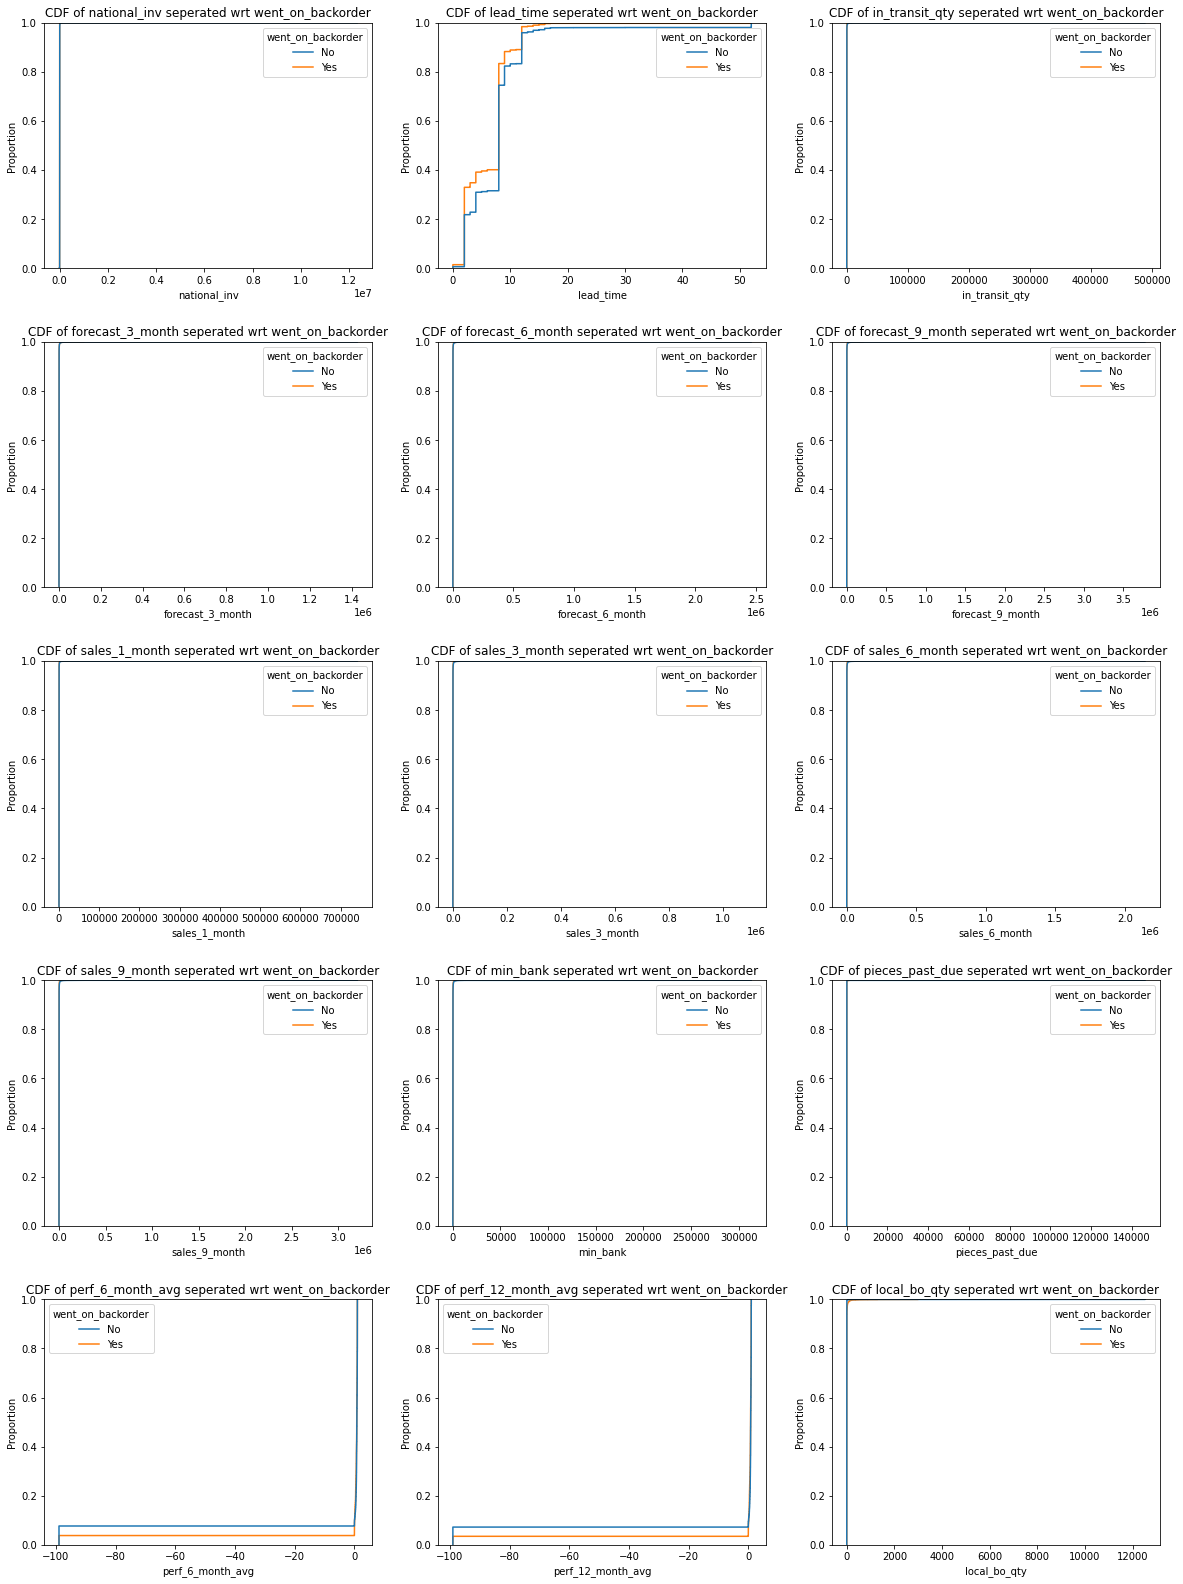

In [32]:
plt.figure(figsize=(20, 28))
for x, y, z in tqdm(zip(range(1,16), numerical_feature_names, seperated_dfs)):
    plt.subplot(5, 3, x)
    plt.subplots_adjust(hspace=0.3)
    sns.ecdfplot(z, x=y, hue='went_on_backorder')
    plt.title(f'CDF of {y} seperated wrt went_on_backorder')
plt.show()

**Observation 6:**

We can see that most of the feature have very high number of datapoints at 0. From the ks test for all the numerical feature we can say most of the features do not have a very good p values and thus we will have to reject the null hypothesis. Therefore, these distributions are not similar are do not show much correlation with the target variable.

However, some features like lead_time, perf_6_month_avg, perf_12_month_avg show good enough correlation with the target variable.

**Stochastic/Probability Matrix for categorical features**

In [33]:
df.replace({'Yes': 1, 'No': 0}, inplace=True)

potential_issue_vs_went_on_backorder = df.loc[:, ['potential_issue', 'went_on_backorder']]
x = np.array(potential_issue_vs_went_on_backorder)

potential_issue_probability_matrix = np.array([[x[np.where((x[:,0] == 0) * (x[:,1] == 0))].shape[0] / len(x), 
                                                x[np.where((x[:,0] == 0) * (x[:,1] == 1))].shape[0] / len(x)],
                                               [x[np.where((x[:,0] == 1) * (x[:,1] == 0))].shape[0] / len(x), 
                                                x[np.where((x[:,0] == 1) * (x[:,1] == 1))].shape[0] / len(x)]])

potential_issue_probability_matrix = pd.DataFrame(potential_issue_probability_matrix, columns=['No', 'Yes'], index=['No', 'Yes'])


C:\Users\ganesh.chandra\Anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [34]:
deck_risk_vs_went_on_backorder = df.loc[:, ['deck_risk', 'went_on_backorder']]
x = np.array(deck_risk_vs_went_on_backorder)

deck_risk_probability_matrix = np.array([[x[np.where((x[:,0] == 0) * (x[:,1] == 0))].shape[0] / len(x),
                                          x[np.where((x[:,0] == 0) * (x[:,1] == 1))].shape[0] / len(x)],
                                         [x[np.where((x[:,0] == 1) * (x[:,1] == 0))].shape[0] / len(x),
                                          x[np.where((x[:,0] == 1) * (x[:,1] == 1))].shape[0] / len(x)]])

deck_risk_probability_matrix = pd.DataFrame(deck_risk_probability_matrix, columns=['No', 'Yes'], index=['No', 'Yes'])

In [35]:
oe_constraint_vs_went_on_backorder = df.loc[:, ['oe_constraint', 'went_on_backorder']]
x = np.array(oe_constraint_vs_went_on_backorder)

oe_constraint_probability_matrix = np.array([[x[np.where((x[:,0] == 0) * (x[:,1] == 0))].shape[0] / len(x),
                                              x[np.where((x[:,0] == 0) * (x[:,1] == 1))].shape[0] / len(x)],
                                             [x[np.where((x[:,0] == 1) * (x[:,1] == 0))].shape[0] / len(x),
                                              x[np.where((x[:,0] == 1) * (x[:,1] == 1))].shape[0] / len(x)]])

oe_constraint_probability_matrix = pd.DataFrame(oe_constraint_probability_matrix, columns=['No', 'Yes'], index=['No', 'Yes'])

In [36]:
ppap_risk_vs_went_on_backorder = df.loc[:, ['ppap_risk', 'went_on_backorder']]
x = np.array(ppap_risk_vs_went_on_backorder)

ppap_risk_probability_matrix = np.array([[x[np.where((x[:,0] == 0) * (x[:,1] == 0))].shape[0] / len(x),
                                          x[np.where((x[:,0] == 0) * (x[:,1] == 1))].shape[0] / len(x)],
                                         [x[np.where((x[:,0] == 1) * (x[:,1] == 0))].shape[0] / len(x),
                                          x[np.where((x[:,0] == 1) * (x[:,1] == 1))].shape[0] / len(x)]])

ppap_risk_probability_matrix = pd.DataFrame(ppap_risk_probability_matrix, columns=['No', 'Yes'], index=['No', 'Yes'])

In [37]:
stop_auto_buy_vs_went_on_backorder = df.loc[:, ['stop_auto_buy', 'went_on_backorder']]
x = np.array(stop_auto_buy_vs_went_on_backorder)

stop_auto_buy_probability_matrix = np.array([[x[np.where((x[:,0] == 0) * (x[:,1] == 0))].shape[0] / len(x),
                                              x[np.where((x[:,0] == 0) * (x[:,1] == 1))].shape[0] / len(x)],
                                             [x[np.where((x[:,0] == 1) * (x[:,1] == 0))].shape[0] / len(x),
                                              x[np.where((x[:,0] == 1) * (x[:,1] == 1))].shape[0] / len(x)]])

stop_auto_buy_probability_matrix = pd.DataFrame(stop_auto_buy_probability_matrix, columns=['No', 'Yes'], index=['No', 'Yes'])

In [38]:
rev_stop_vs_went_on_backorder = df.loc[:, ['rev_stop', 'went_on_backorder']]
x = np.array(rev_stop_vs_went_on_backorder)

rev_stop_probability_matrix = np.array([[x[np.where((x[:,0] == 0) * (x[:,1] == 0))].shape[0] / len(x),
                                             x[np.where((x[:,0] == 0) * (x[:,1] == 1))].shape[0] / len(x)],
                                            [x[np.where((x[:,0] == 1) * (x[:,1] == 0))].shape[0] / len(x),
                                             x[np.where((x[:,0] == 1) * (x[:,1] == 1))].shape[0] / len(x)]])

rev_stop_probability_matrix = pd.DataFrame(rev_stop_probability_matrix, columns=['No', 'Yes'], index=['No', 'Yes'])

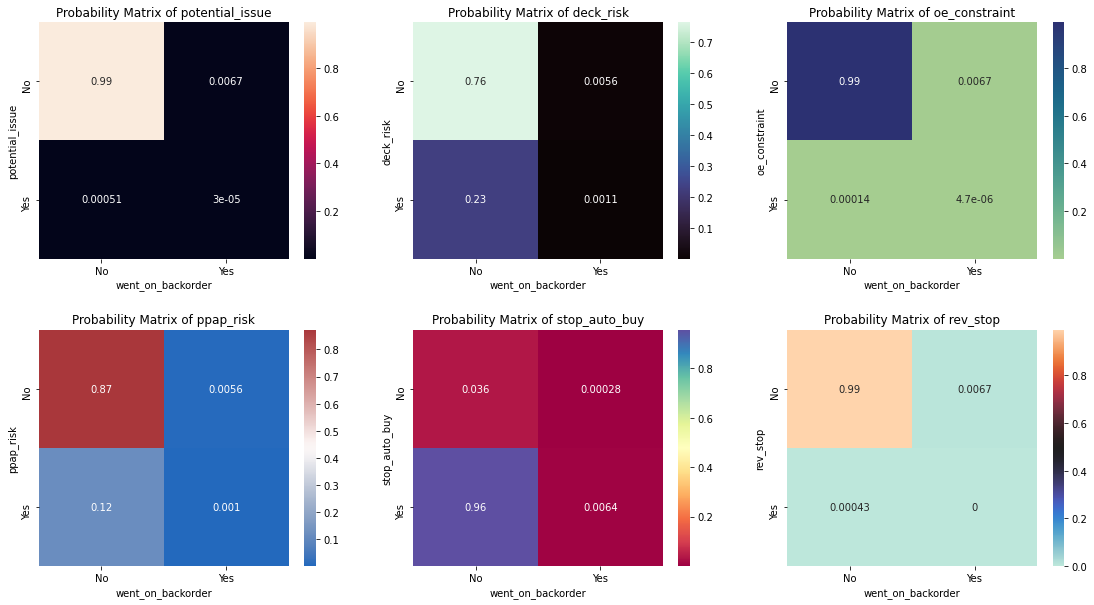

In [39]:
plt.figure(figsize=(19, 10))
plt.subplot(2, 3, 1)
plt.subplots_adjust(hspace=0.3)
sns.heatmap(potential_issue_probability_matrix, annot=True, cmap='rocket')
plt.title("Probability Matrix of potential_issue")
plt.xlabel('went_on_backorder')
plt.ylabel('potential_issue')

plt.subplot(2, 3, 2)
plt.subplots_adjust(hspace=0.3)
sns.heatmap(deck_risk_probability_matrix, annot=True, cmap='mako')
plt.title("Probability Matrix of deck_risk")
plt.xlabel('went_on_backorder')
plt.ylabel('deck_risk')

plt.subplot(2, 3, 3)
plt.subplots_adjust(hspace=0.3)
sns.heatmap(oe_constraint_probability_matrix, annot=True, cmap='crest')
plt.title("Probability Matrix of oe_constraint")
plt.xlabel('went_on_backorder')
plt.ylabel('oe_constraint')

plt.subplot(2, 3, 4)
plt.subplots_adjust(hspace=0.3)
sns.heatmap(ppap_risk_probability_matrix, annot=True, cmap='vlag')
plt.title("Probability Matrix of ppap_risk")
plt.xlabel('went_on_backorder')
plt.ylabel('ppap_risk')

plt.subplot(2, 3, 5)
plt.subplots_adjust(hspace=0.3)
sns.heatmap(stop_auto_buy_probability_matrix, annot=True, cmap='Spectral')
plt.title("Probability Matrix of stop_auto_buy")
plt.xlabel('went_on_backorder')
plt.ylabel('stop_auto_buy')

plt.subplot(2, 3, 6)
plt.subplots_adjust(hspace=0.3)
sns.heatmap(rev_stop_probability_matrix, annot=True, cmap='icefire')
plt.title("Probability Matrix of rev_stop")
plt.xlabel('went_on_backorder')
plt.ylabel('rev_stop')

plt.show()

In [40]:
#saving to csv so we can use it for building the model
import pandas as pd
potential_issue_probability_matrix.to_csv('potential_issue_probability_matrix.csv', index=False)
deck_risk_probability_matrix.to_csv('deck_risk_probability_matrix.csv', index=False)
oe_constraint_probability_matrix.to_csv('oe_constraint_probability_matrix.csv', index=False)
ppap_risk_probability_matrix.to_csv('ppap_risk_probability_matrix.csv', index=False)
stop_auto_buy_probability_matrix.to_csv('stop_auto_buy_probability_matrix.csv', index=False)
rev_stop_probability_matrix.to_csv('rev_stop_probability_matrix.csv', index=False)

**Observation 7:**

From the above set of probaility matrices for all the categorical features we see that most of these categorical features have a very high probability of having a negetive flag when the product did not go into backorder. Therefore, we can say that when a product does not go into backorder, most of the general risk flag are negative.

**Dimensionality Reduction:**

**Principal Component Analysis**

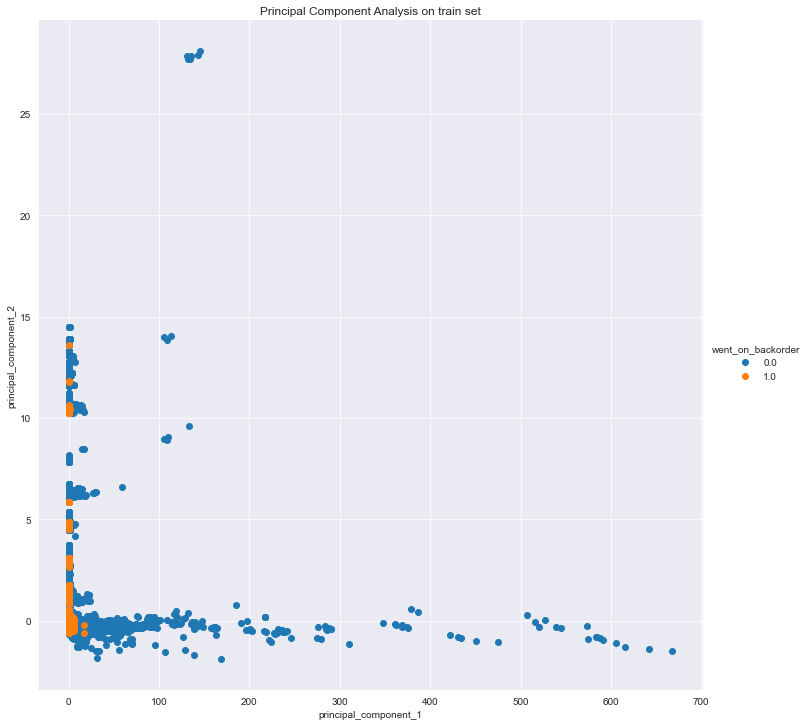

In [42]:
#we will perform pca for all the data points which do not have missing values
x_train = df.dropna().drop('went_on_backorder', axis=1)
y_train = df.dropna()['went_on_backorder']

standard_scalar = StandardScaler()

std_x_train = standard_scalar.fit_transform(x_train)

model = PCA(n_components=2, random_state=42)
pca_data = model.fit_transform(std_x_train)
pca_data = np.vstack((pca_data.T, y_train)).T
pca_df = pd.DataFrame(data=pca_data, columns=("principal_component_1", "principal_component_2", "went_on_backorder"))

sns.set_style("darkgrid")
sns.FacetGrid(pca_df, hue='went_on_backorder', height=10).map(plt.scatter, 'principal_component_1', 'principal_component_2').add_legend()
plt.title("Principal Component Analysis on train set")
plt.show()


**Observation 8:**

We have used dimensionality reduction techniques, in this case Principal Component Analysis to capture the essence of the data. From the above plot we see that most of the datapoints lie alongside 0. This deduction is true because we have seen many features with mostly 0 values in our EDA. There are outliers in the data but those datapoints does not have to be outlier per se. Furthermore, these potential outliers are more of the negative class compared to the positive class. And, for the positive class, almost all of the datapoints lie alongside 0

# Feature Engineering

Imputing Missing values via mean method for continuous data column "Lead_Time"

In [43]:
import numpy as np
train = df.fillna(np.mean(df['lead_time']))

In [44]:
lead_time_mean = np.array(np.mean(train['lead_time']))

In [45]:
np.save("lead_time_mean.npy",lead_time_mean)

In above step mean imputation was done for "lead_time".

In upcoming steps we will focus on categorical columns feature engineering. Two specific columns "Pieces_past_due" &
"local_b0_quantity" majority of the values are 0. Hence adding another feature showing if each datapoint in the two features 
is 0 or non 0 since evry non 0 value is a quantity and we are interested in whether it went to backorder or not.

In [46]:
train['pieces_past_due'].value_counts()

0.0       1662571
1.0          3917
2.0          2187
4.0          1294
3.0          1217
           ...   
2600.0          1
163.0           1
2620.0          1
2628.0          1
2271.0          1
Name: pieces_past_due, Length: 826, dtype: int64

In [47]:
conditions = [train['pieces_past_due'] == 0, train['pieces_past_due'] > 0]
values = [0, 1]
train['binary_pieces_past_due'] = np.select(conditions, values)
train['binary_pieces_past_due'].value_counts()

0    1662571
1      25289
Name: binary_pieces_past_due, dtype: int64

In [48]:
train['local_bo_qty'].value_counts()

0.0       1664518
1.0          7151
2.0          2982
3.0          1716
4.0          1224
           ...   
1379.0          1
316.0           1
1399.0          1
314.0           1
511.0           1
Name: local_bo_qty, Length: 654, dtype: int64

In [49]:
conditions = [train['local_bo_qty'] == 0, train['local_bo_qty'] > 0]
values = [0, 1]

train['binary_local_bo_qty'] = np.select(conditions, values)
train['binary_local_bo_qty'].value_counts()

0    1664518
1      23342
Name: binary_local_bo_qty, dtype: int64

For rest of our categorical features we will impute the 0 values with the respective probability values from the probability matrices.

Potential_issue:

In [50]:
conditions = [train['potential_issue'] == 0, train['potential_issue'] == 1]
values = [potential_issue_probability_matrix['No'][0], potential_issue_probability_matrix['No'][1]]

train['potential_issue'] = np.select(conditions, values)
train['potential_issue'].value_counts()

0.992802    1686953
0.000507        907
Name: potential_issue, dtype: int64

Deck_Risk:

In [51]:
conditions = [train['deck_risk'] == 0, train['deck_risk'] == 1]
values = [deck_risk_probability_matrix['No'][0], deck_risk_probability_matrix['No'][1]]

train['deck_risk'] = np.select(conditions, values)
train['deck_risk'].value_counts()

0.764874    1300377
0.228435     387483
Name: deck_risk, dtype: int64

Oe_Constraint:

In [52]:
conditions = [train['oe_constraint'] == 0, train['oe_constraint'] == 1]
values = [oe_constraint_probability_matrix['No'][0], oe_constraint_probability_matrix['No'][1]]

train['oe_constraint'] = np.select(conditions, values)
train['oe_constraint'].value_counts()

0.993169    1687615
0.000140        245
Name: oe_constraint, dtype: int64

Ppap_Risk:

In [53]:
conditions = [train['ppap_risk'] == 0, train['ppap_risk'] == 1]
values = [ppap_risk_probability_matrix['No'][0], ppap_risk_probability_matrix['No'][1]]

train['ppap_risk'] = np.select(conditions, values)
train['ppap_risk'].value_counts()

0.873587    1484026
0.119723     203834
Name: ppap_risk, dtype: int64

Stop_auto_buy:

In [54]:
conditions = [train['stop_auto_buy'] == 0, train['stop_auto_buy'] == 1]
values = [stop_auto_buy_probability_matrix['No'][0], stop_auto_buy_probability_matrix['No'][1]]

train['stop_auto_buy'] = np.select(conditions, values)
train['stop_auto_buy'].value_counts()

0.957397    1626774
0.035912      61086
Name: stop_auto_buy, dtype: int64

Rev_stop:

In [55]:
conditions = [train['rev_stop'] == 0, train['rev_stop'] == 1]
values = [rev_stop_probability_matrix['No'][0], rev_stop_probability_matrix['No'][1]]

train['rev_stop'] = np.select(conditions, values)
train['rev_stop'].value_counts()

0.992876    1687129
0.000433        731
Name: rev_stop, dtype: int64

Same Pre-processing and feature engineering steps from above are applied to test data as well ensuring values imputed in the test set are calculated from train set itself avoiding any data leakage.

In [56]:
test.drop('sku', axis=1, inplace=True)

test = test.fillna(np.mean(train['lead_time'])) #train mean imputation

test.replace({'Yes': 1, 'No': 0}, inplace=True) #converting categorical features to binary features

conditions = [test['pieces_past_due'] == 0, test['pieces_past_due'] > 0]
values = [0, 1]

test['binary_pieces_past_due'] = np.select(conditions, values)

conditions = [test['local_bo_qty'] == 0, test['local_bo_qty'] > 0]
values = [0, 1]

test['binary_local_bo_qty'] = np.select(conditions, values)

C:\Users\ganesh.chandra\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [58]:
conditions_pot = [test['potential_issue'] == 0, test['potential_issue'] == 1]
values_pot = [potential_issue_probability_matrix['No'][0], potential_issue_probability_matrix['No'][1]]
test['potential_issue'] = np.select(conditions_pot, values_pot)

conditions_de = [test['deck_risk'] == 0, test['deck_risk'] == 1]
values_de = [deck_risk_probability_matrix['No'][0], deck_risk_probability_matrix['No'][1]]
test['deck_risk'] = np.select(conditions_de, values_de)

conditions_oc = [test['oe_constraint'] == 0, test['oe_constraint'] == 1]
values_oc = [oe_constraint_probability_matrix['No'][0], oe_constraint_probability_matrix['No'][1]]
test['oe_constraint'] = np.select(conditions_oc, values_oc)

conditions_pr = [test['ppap_risk'] == 0, test['ppap_risk'] == 1]
values_pr = [ppap_risk_probability_matrix['No'][0], ppap_risk_probability_matrix['No'][1]]
test['ppap_risk'] = np.select(conditions_pr, values_pr)

conditions_stpa = [test['stop_auto_buy'] == 0, test['stop_auto_buy'] == 1]
values_stpa = [stop_auto_buy_probability_matrix['No'][0], stop_auto_buy_probability_matrix['No'][1]]
test['stop_auto_buy'] = np.select(conditions_stpa, values_stpa)

conditions_revs = [test['rev_stop'] == 0, test['rev_stop'] == 1]
values_revs = [rev_stop_probability_matrix['No'][0], rev_stop_probability_matrix['No'][1]]
test['rev_stop'] = np.select(conditions_revs, values_revs)

print("The final dataset that we can use to build a machine learning model is as follows, where the column 'went_on_backorder' is our target label:\n")
test

The final dataset that we can use to build a machine learning model is as follows, where the column 'went_on_backorder' is our target label:



,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,binary_pieces_past_due,binary_local_bo_qty
0,62.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99.00,0.0,0.228435,0.993169,0.873587,0.957397,0.992876,0,0,0
1,9.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99.00,0.0,0.764874,0.993169,0.119723,0.035912,0.992876,0,0,0
2,17.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.95,0.0,0.764874,0.993169,0.873587,0.957397,0.992876,0,0,0
3,9.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.75,0.0,0.764874,0.993169,0.119723,0.957397,0.992876,0,0,0
4,2.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.71,0.0,0.764874,0.993169,0.873587,0.957397,0.992876,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242070,12.0,12.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.48,0.0,0.228435,0.993169,0.873587,0.957397,0.992876,0,0,0
242071,13.0,12.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.48,0.0,0.228435,0.993169,0.873587,0.957397,0.992876,0,0,0
242072,13.0,12.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.48,0.0,0.228435,0.993169,0.873587,0.957397,0.992876,0,0,0
242073,10.0,12.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.48,0.0,0.228435,0.993169,0.873587,0.957397,0.992876,0,0,0


Exporting Pre-processed train and test sets:

In [ ]:
train.to_csv('preprocessed_train.csv')

In [ ]:
test.to_csv('preprocessed_test.csv')

# Plotting for PCA post Feature Engineering:

In [60]:
# Dropping categorical features
x_train = train.dropna().drop('went_on_backorder', axis=1)
x_train = train.dropna().drop('sku', axis=1)
y_train = train.dropna()['went_on_backorder']

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


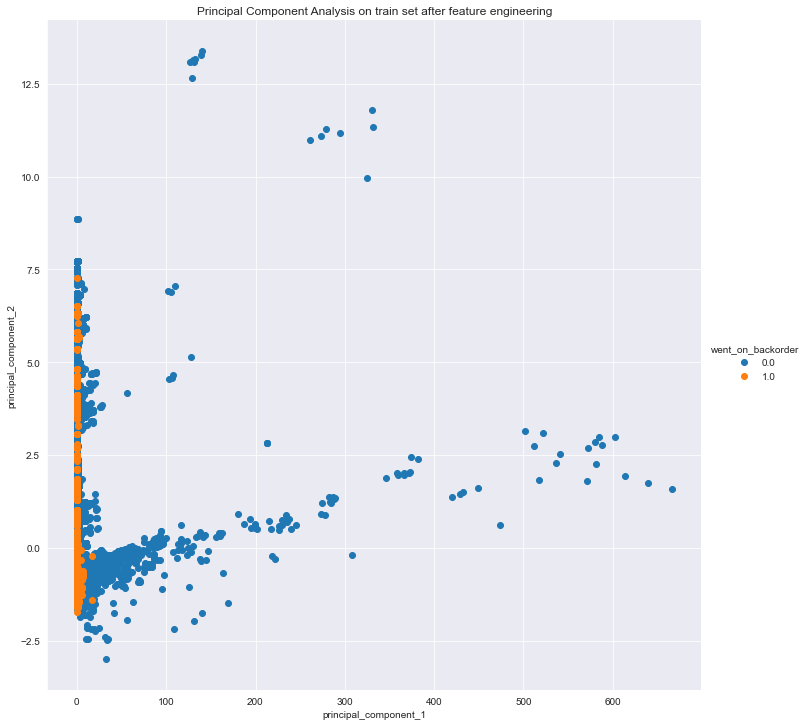

In [61]:
#PCA Plot
standard_scalar = StandardScaler()
std_x_train = standard_scalar.fit_transform(x_train)
#std_x_train_transform(x_train)
model = PCA(n_components=2, random_state=42)
pca_data = model.fit_transform(std_x_train)
pca_data = np.vstack((pca_data.T, y_train)).T
pca_df = pd.DataFrame(data=pca_data, columns=("principal_component_1", "principal_component_2", "went_on_backorder"))
sns.set_style("darkgrid")
sns.FacetGrid(pca_df, hue='went_on_backorder', height=10).map(plt.scatter, 'principal_component_1', 'principal_component_2').add_legend()
plt.title("Principal Component Analysis on train set after feature engineering")
plt.show()